I choosed to study the TDC algorithm on a bigger example and compare its behavior with the semi-gradient TD. I took for example a random MDP generated once with a fixed number of states and actions. 
The random parts that are generated are the MDP (transitions probabilities and rewards), the policies (target policy and behavior policy) and the features vector. 

This notebook contains only the graphical results of the experiments, the functions that I used are described in the 3 other python files. 

I studied several patterns: when the number of features is smaller than the number of states (the real life case since usually there are a large number of states), equal and higher. This last experiment should show a really bad performance measure. That is what we get. 

In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt

In [2]:
import mdp

In [3]:
import algo

In [4]:
import exp

In [86]:
reload(mdp)
reload(algo)
reload(exp)

<module 'exp' from 'exp.py'>

# Experiments with 400 states 10 actions and 200 features

In [9]:
n_states = 400
n_actions = 10
n_features = 201
discount = 0.95

In [59]:
mu,pi,P_3D,r,Phi = mdp.sampleMatrices(n_states,n_actions,n_features)
Ptarget = mdp.getTransition(P_3D,pi)
Pbehavior = mdp.getTransition(P_3D,mu)
Rtarget = mdp.getRewardVector(r,pi)
Rbehavior = mdp.getRewardVector(r,mu)

In [61]:
d_pi = mdp.getDistribution(pi,P_3D,n_actions,n_states,50000)
d_mu = mdp.getDistribution(mu,P_3D,n_actions,n_states,50000)
D_pi = np.diag(np.array(d_pi))
D_mu = np.diag(np.array(d_mu))

### On policy settings

In [69]:
alpha = 0.001
beta = 0.005
maxSteps = 10000
nbRuns = 10

In [70]:
TDC_onp,TD_onp = exp.onpolicy(alpha,beta,maxSteps,nbRuns,n_states,n_features,n_actions,P_3D,pi,mu,discount,Phi,Ptarget,D_pi,False,r)

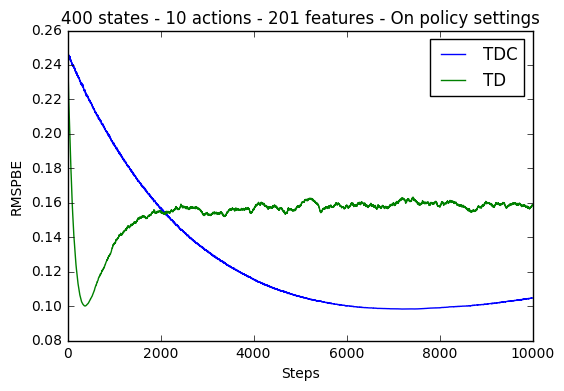

In [71]:
plt.plot(range(maxSteps),TDC_onp,label='TDC',color='blue')
plt.plot(range(maxSteps),TD_onp,label='TD',color='green')
plt.legend()
plt.title('400 states - 10 actions - 201 features - On policy settings')
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.show()

The RMSPBE performance of the two algorithms are significantly different. Conventional TD converges faster than TDC as we saw for the 5-states random walk. 

### Off policy settings

In [6]:
alpha = 0.001
beta = 0.005
maxSteps2 = 10000
nbRuns2 = 20

In [79]:
TDC_offp2,TD_offp2 = exp.offpolicy(alpha,beta,maxSteps2,nbRuns2,n_states,n_features,n_actions,P_3D,pi,mu,discount,Phi,Ptarget,D_mu,True,r)

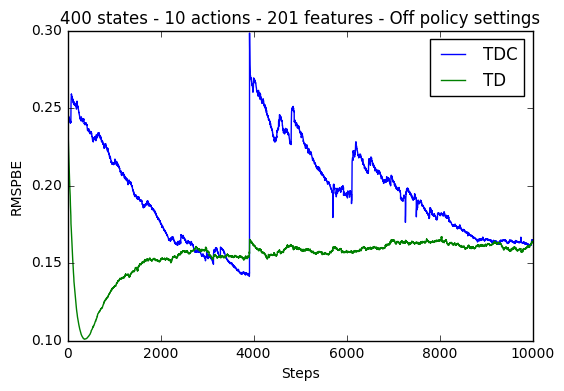

In [80]:
plt.plot(range(maxSteps2),TDC_offp2,label='TDC',color='blue')
plt.plot(range(maxSteps2),TD_offp2,label='TD',color='green')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.title('400 states - 10 actions - 201 features - Off policy settings')
plt.show()

## Experiments with 600 states 10 actions and 200 features

In [10]:
n_states2 = 600

In [11]:
mu2,pi2,P_3D2,r2,Phi2 = mdp.sampleMatrices(n_states2,n_actions,n_features)
Ptarget2 = mdp.getTransition(P_3D2,pi2)
Pbehavior2 = mdp.getTransition(P_3D2,mu2)
Rtarget2 = mdp.getRewardVector(r2,pi2)
Rbehavior2 = mdp.getRewardVector(r2,mu2)

In [12]:
d_pi2 = mdp.getDistribution(pi2,P_3D2,n_actions,n_states2,20000)
d_mu2 = mdp.getDistribution(mu2,P_3D2,n_actions,n_states2,20000)
D_pi2 = np.diag(np.array(d_pi2))
D_mu2 = np.diag(np.array(d_mu2))

### On policy settings

In [13]:
TDC_onp2,TD_onp2 = exp.onpolicy(alpha,beta,5000,10,n_states2,n_features,n_actions,P_3D2,pi2,mu2,discount,Phi2,Ptarget2,D_pi2,False,r2)

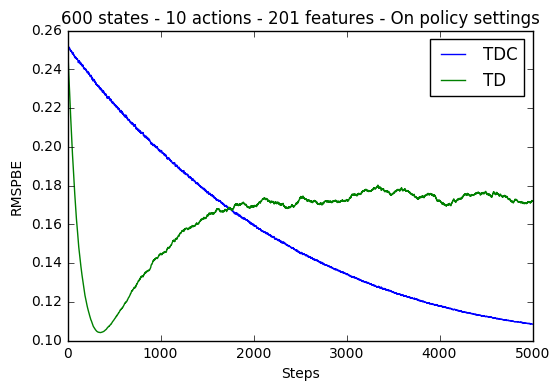

In [14]:
plt.plot(range(5000),TDC_onp2,label='TDC',color='blue')
plt.plot(range(5000),TD_onp2,label='TD',color='green')
plt.legend()
plt.title('600 states - 10 actions - 201 features - On policy settings')
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.show()

### Off policy settings

In [15]:
TDC_offp3,TD_offp3 = exp.offpolicy(alpha,beta,5000,10,n_states2,n_features,n_actions,P_3D2,pi2,mu2,discount,Phi2,Ptarget2,D_mu2,True,r2)

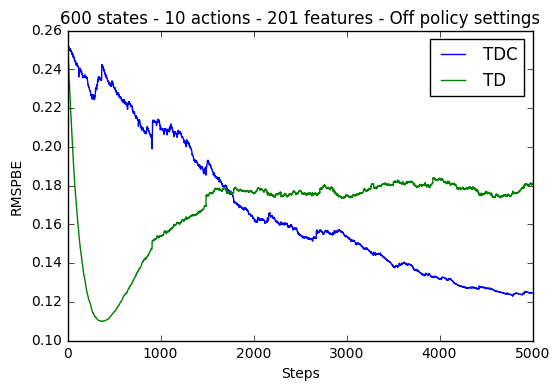

In [17]:
plt.plot(range(5000),TDC_offp3,label='TDC',color='blue')
plt.plot(range(5000),TD_offp3,label='TD',color='green')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.title('600 states - 10 actions - 201 features - Off policy settings')
plt.show()

## Experiments with 400 states 10 actions and 400 features

In [18]:
n_states3 = 400
n_actions3 = 10
n_features3 = 400

mu3,pi3,P_3D3,r3,Phi3 = mdp.sampleMatrices(n_states3,n_actions3,n_features3)
Ptarget3 = mdp.getTransition(P_3D3,pi3)
Pbehavior3 = mdp.getTransition(P_3D3,mu3)
Rtarget3 = mdp.getRewardVector(r3,pi3)
Rbehavior3 = mdp.getRewardVector(r3,mu3)

d_pi3 = mdp.getDistribution(pi3,P_3D3,n_actions3,n_states3,20000)
d_mu3 = mdp.getDistribution(mu3,P_3D3,n_actions3,n_states3,20000)
D_pi3 = np.diag(np.array(d_pi3))
D_mu3 = np.diag(np.array(d_mu3))

In [19]:
TDC_onp3,TD_onp3 = exp.onpolicy(alpha,beta,5000,10,n_states3,n_features3,n_actions3,P_3D3,pi3,mu3,discount,Phi3,Ptarget3,D_pi3,False,r3)

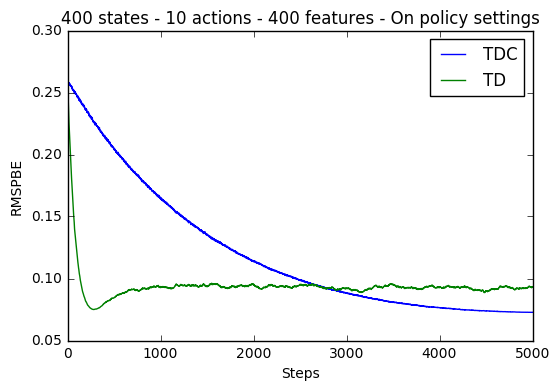

In [20]:
plt.plot(range(5000),TDC_onp3,label='TDC',color='blue')
plt.plot(range(5000),TD_onp3,label='TD',color='green')
plt.legend()
plt.title('400 states - 10 actions - 400 features - On policy settings')
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.show()

In [21]:
TDC_offp4,TD_offp4 = exp.offpolicy(alpha,beta,5000,10,n_states3,n_features3,n_actions3,P_3D3,pi3,mu3,discount,Phi3,Ptarget3,D_mu3,True,r3)

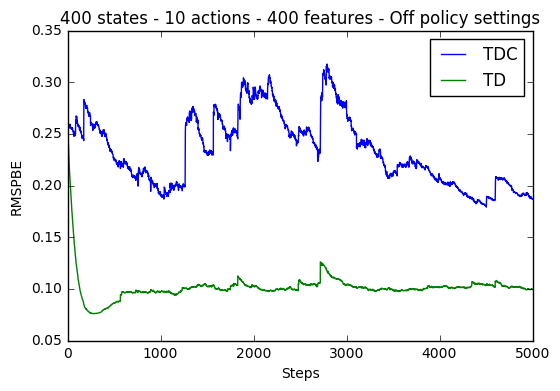

In [22]:
plt.plot(range(5000),TDC_offp4,label='TDC',color='blue')
plt.plot(range(5000),TD_offp4,label='TD',color='green')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.title('400 states - 10 actions - 400 features - Off policy settings')
plt.show()

## Experiments with 400 states 10 actions and 600 features

In [23]:
n_states4 = 400
n_actions4 = 10
n_features4 = 600

mu4,pi4,P_3D4,r4,Phi4 = mdp.sampleMatrices(n_states4,n_actions4,n_features4)
Ptarget4 = mdp.getTransition(P_3D4,pi4)
Pbehavior4 = mdp.getTransition(P_3D4,mu4)
Rtarget4 = mdp.getRewardVector(r4,pi4)
Rbehavior4 = mdp.getRewardVector(r4,mu4)

d_pi4 = mdp.getDistribution(pi4,P_3D4,n_actions4,n_states4,20000)
d_mu4 = mdp.getDistribution(mu4,P_3D4,n_actions4,n_states4,20000)
D_pi4 = np.diag(np.array(d_pi4))
D_mu4 = np.diag(np.array(d_mu4))

In [24]:
TDC_onp4,TD_onp4 = exp.onpolicy(alpha,beta,5000,10,n_states4,n_features4,n_actions4,P_3D4,pi4,mu4,discount,Phi4,Ptarget4,D_pi4,False,r4)

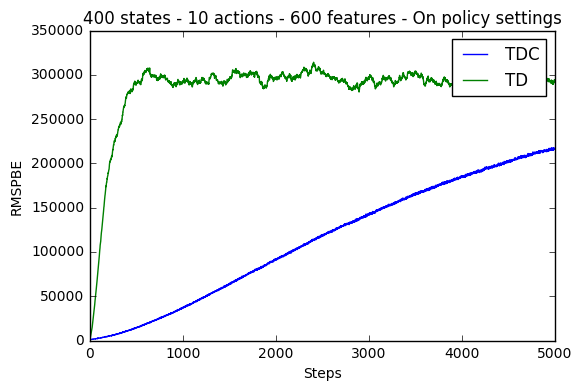

In [25]:
plt.plot(range(5000),TDC_onp4,label='TDC',color='blue')
plt.plot(range(5000),TD_onp4,label='TD',color='green')
plt.legend()
plt.title('400 states - 10 actions - 600 features - On policy settings')
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.show()

In [26]:
TDC_offp5,TD_offp5 = exp.offpolicy(alpha,beta,5000,10,n_states4,n_features4,n_actions4,P_3D4,pi4,mu4,discount,Phi4,Ptarget4,D_mu4,True,r4)

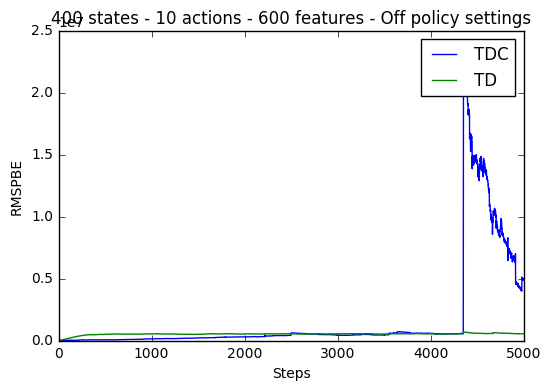

In [27]:
plt.plot(range(5000),TDC_offp5,label='TDC',color='blue')
plt.plot(range(5000),TD_offp5,label='TD',color='green')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('RMSPBE')
plt.title('400 states - 10 actions - 600 features - Off policy settings')
plt.show()